## **FFT Example**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tables

In [2]:
from scipy.fft import fft as sfft
from scipy.fft import ifft as sifft
from scipy.fft import fftfreq as sfftfreq

In [9]:
file = tables.open_file("diagnostics.h5", "r")

In [10]:
file.root

/ (RootGroup) ''
  children := ['charge' (Array), 'corr' (EArray), 'emitx' (EArray), 'emitxy' (EArray), 'emitxyz' (EArray), 'emity' (EArray), 'emitz' (EArray), 'mass' (Array), 'max' (EArray), 'mean' (EArray), 'min' (EArray), 'mom2' (EArray), 'num_particles' (EArray), 'pz' (EArray), 'real_num_particles' (EArray), 'repetition' (EArray), 's' (EArray), 's_n' (EArray), 'std' (EArray)]

In [11]:
s = file.root.s
x_std = file.root.std[0,:]
x_mean = file.root.mean[0,:]

In [12]:
#file.close()

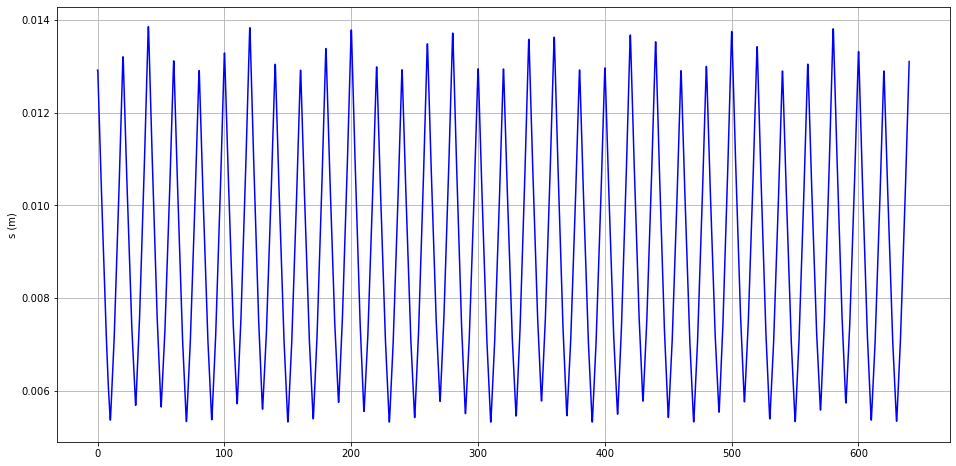

In [13]:
plt.figure(figsize = (16, 8))
plt.plot(s, x_std, 'b', label='x_std')
plt.ylabel('s (m)')
plt.grid()

plt.show()

In [14]:
X = sfft(x_std)

N = len(x_std)
freq = sfftfreq(N, 1/N)

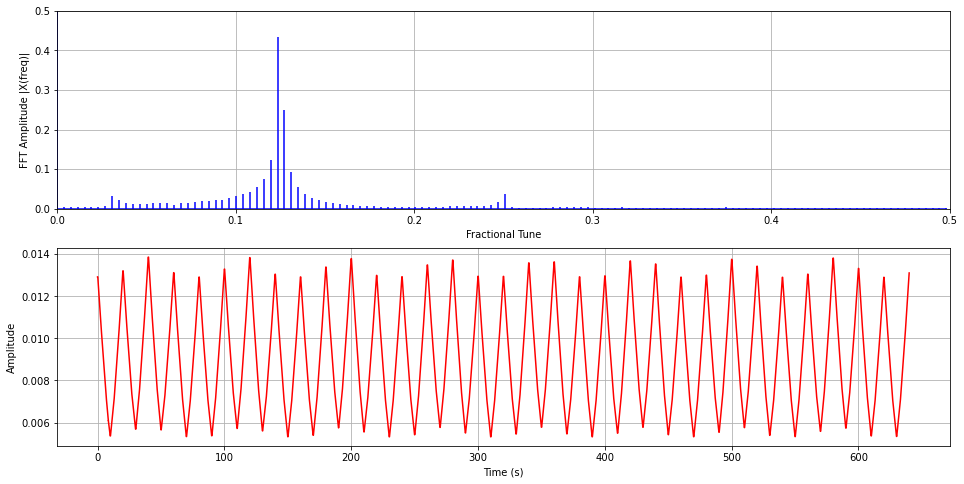

In [17]:
plt.figure(figsize = (16, 8))
plt.subplot(211)

plt.stem(freq/N, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Fractional Tune')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.grid()

plt.subplot(212)
plt.plot(s, np.real(sifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

In [18]:
freq[np.argsort(np.abs(X))] / N

array([-0.43629344,  0.43629344, -0.47104247,  0.47104247, -0.42084942,
        0.42084942, -0.41698842,  0.41698842, -0.42471042,  0.42471042,
       -0.41312741,  0.41312741, -0.42857143,  0.42857143,  0.44015444,
       -0.44015444, -0.44401544,  0.44401544, -0.43243243,  0.43243243,
       -0.47490347,  0.47490347,  0.4015444 , -0.4015444 ,  0.44787645,
       -0.44787645,  0.3976834 , -0.3976834 ,  0.45173745, -0.45173745,
        0.47876448, -0.47876448, -0.48262548,  0.48262548,  0.45559846,
       -0.45559846,  0.40926641, -0.40926641, -0.39382239,  0.39382239,
       -0.48648649,  0.48648649,  0.49034749, -0.49034749,  0.49420849,
       -0.49420849,  0.4980695 , -0.4980695 ,  0.45945946, -0.45945946,
        0.40540541, -0.40540541,  0.38996139, -0.38996139, -0.38610039,
        0.38610039, -0.46332046,  0.46332046, -0.38223938,  0.38223938,
       -0.37837838,  0.37837838, -0.36679537,  0.36679537,  0.37065637,
       -0.37065637,  0.36293436, -0.36293436,  0.35907336, -0.35

In [19]:
freq[32] / N

0.12355212355212356